In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Coletando nossos dados

In [ ]:
url = 'https://github.com/Mirlaa/oficina-limpeza-tratamento/raw/main/dado/dados_oficina.csv'

In [ ]:
df = pd.read_csv(url)
df.head()

## Do que se tratam os dados

**Dicionário de dados:** Informação sobre nossos dados.

- `id`: Identificação única de cada registro;
- `idade`: Idade do cliente;
- `profissao`: Profissão do cliente;
- `estado_civil`: Estado civil do cliente;
- `educacao`: Nível de educação do cliente;
- `inadimplencia`: Indica se o cliente está inadimplente
- `saldo`: Saldo na conta do cliente;
- `habitacao`: Indica se o cliente possui habitação;
- `emprestimo`: Indica se o cliente possui empréstimo;
- `contato`: Tipo de contato com o cliente;
- `dia`: Dia do mês do último contato;
- `mes`: Mês do último contato;
- `duracao`: Duração da última ligação em segundos;
- `campanha`: Número de contatos realizados durante esta campanha;
- `contatos_anteriores`: Número de contatos realizados antes desta campanha;
- `resultado_campanha_anterior`: Resultado da campanha anterior; e
- `alvo`: Alvo da campanha.

In [ ]:
df.info()

**Observações:**

- existem várias colunas com valores nulos
- todos os valores estão no tipo apropriado, caso não estivessem usaríamos o método [`astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [ ]:
df.describe()

**Observações:**

- Coluna `idade` com valores irreais
- Valores nulos em algumas colunas

In [ ]:
df.nunique()

**Observações:**

- Coluna `id` mostra que tem ids duplicados
- Temos colunas numéricas com apenas duas categorias, podem ser binários

## Lidando com duplicados e nulos

### Dados duplicados

Amostras duplicadas são dados que possuem **os mesmos valores** em colunas correspondentes.

Por exemplo, não há distinção da amostra A para amostra B, justamente porque todos os valores de colunas correspondentes são iguais. Por isso, transmitem **apenas uma informação.**

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

O que fazer com essas amostras? Devemos removê-las do banco de dados.

Podemos citar três motivos principais para a remoção das amostras duplicadas:

- **Viés do modelo**: se há amostras duplicadas no conjunto de dados, pode ser que o modelo de machine learning dê mais importância para essas amostras repetidas.
- **Melhora do desempenho do modelo**: se inserimos amostras duplicadas, vão ser necessários mais cálculos e poder de processamento, além de ser um desperdício computacional trabalhar com amostras com o mesmo valor e que transmitem a mesma informação.
- **Aumento da qualidade dos resultados**: vamos inserir informações únicas, sem dados repetidos. Ou seja, vão ser mais relevantes para o modelo.

In [ ]:
df.drop_duplicates(inplace=True)
df

In [ ]:
df.duplicated().sum()

### Dados nulos

Dados nulos são valores que estão ausentes ou são desconhecidos na base de dados.

In [ ]:
df.isnull().sum()

**Observações:**

- Apenas as colunas `idade` e `saldo` são colunas numéricas e ambas contém pouquíssimos dados nulos
- As colunas `profissao`, `educacao`, `resultado_campanha_anterior` contém dados nulos com diferentes valores.

### Dados numéricos

Não sabemos os valores originais em `idade` e `saldo`, mas não podemos substituir por qualquer valor.

- Viés nos dados: o modelo de machine learning vai tentar procurar padrões que vão estar incorretos, pois não são os dados reais. Isso pode levar a previsões enganosas, incorretas e que não são satisfatórias.
- Distorção de resultados: inserir um valor que não é o correto faz com que o modelo aprenda com dados incorretos e, consequentemente, levam a previsões que podem ser incorretas.

In [ ]:
df.dropna(subset=['idade','saldo'])

In [ ]:
df.dropna(subset=['idade','saldo'], inplace=True)

In [ ]:
df.isnull().sum()

### Dados textuais

In [ ]:
for col in ['profissao','educacao','resultado_campanha_anterior']:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("\n")

In [ ]:
df['profissao'].fillna('desconhecido', inplace = True)
df['educacao'].fillna('desconhecido', inplace = True)
df['resultado_campanha_anterior'].fillna('desconhecido', inplace = True)

In [ ]:
df.isnull().sum()

Vamos resetar os índices devido a esses índices saltados que devem ser evitados em machine learning.

In [ ]:
df.reset_index(drop=True, inplace=True)

## Verificando outliers

Outliers, que são valores atípicos ou um ponto fora da curva. Em estatística, isso significa um dado que se distancia muito da distribuição padrão que os dados apresentam.

In [ ]:
df_numericos = df.select_dtypes(include="number")
df_numericos.head()

**Conhecendo o boxplot:**

![](https://github.com/Mirlaa/oficina-limpeza-tratamento/blob/main/boxplot.png?raw=true)

No centro da caixa, encontramos a mediana, que divide os dados ao meio, com 50% à esquerda e 50% à direita.

Nos cantos superiores esquerdo e direito da caixa, estão os quartis Q1 e Q3, que dividem os dados em quatro partes iguais, cada uma com 25% dos dados. Até Q1, temos os 25% menores dados, enquanto Q3 abrange os 25% maiores.

Entre Q1 e Q3, encontramos os 75% dos dados, onde Q2 é a mediana. A partir de Q3, temos os 25% finais dos dados.

Acima da caixa, calculamos o IIQ (Intervalo Interquartil), que é a diferença entre Q3 e Q1.

À esquerda e à direita da caixa, existem duas arestas. Na aresta esquerda, calculamos o limite inferior como "Q1 - 1,5 x IIQ", e na aresta direita, o limite superior como "Q3 + 1,5 x IIQ". Valores abaixo do limite inferior ou acima do limite superior são considerados candidatos a outliers, que estamos buscando identificar.

In [ ]:
df_numericos.describe()

<Axes: xlabel='idade'>

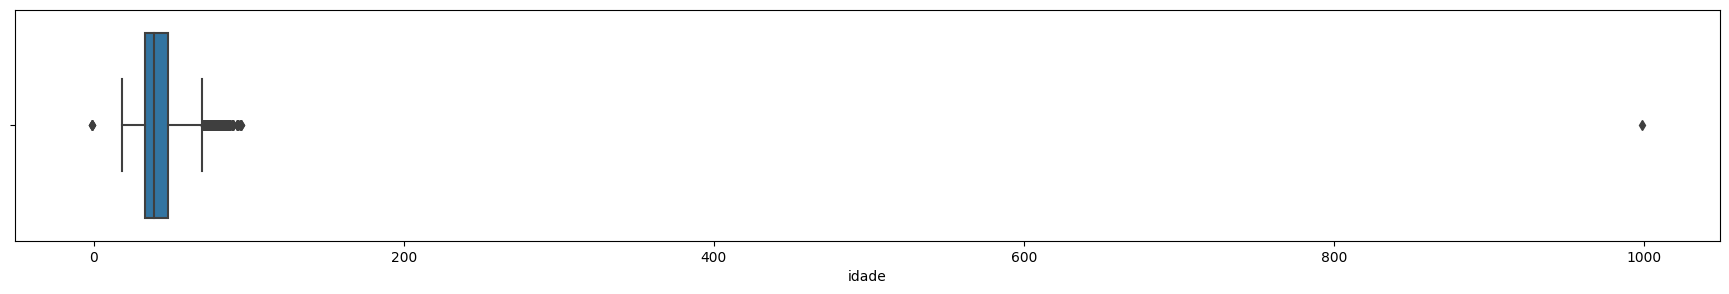

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['idade'])

In [ ]:
df = df[df['idade']>= 18]
df = df[df['idade']< 120]

<Axes: xlabel='idade'>

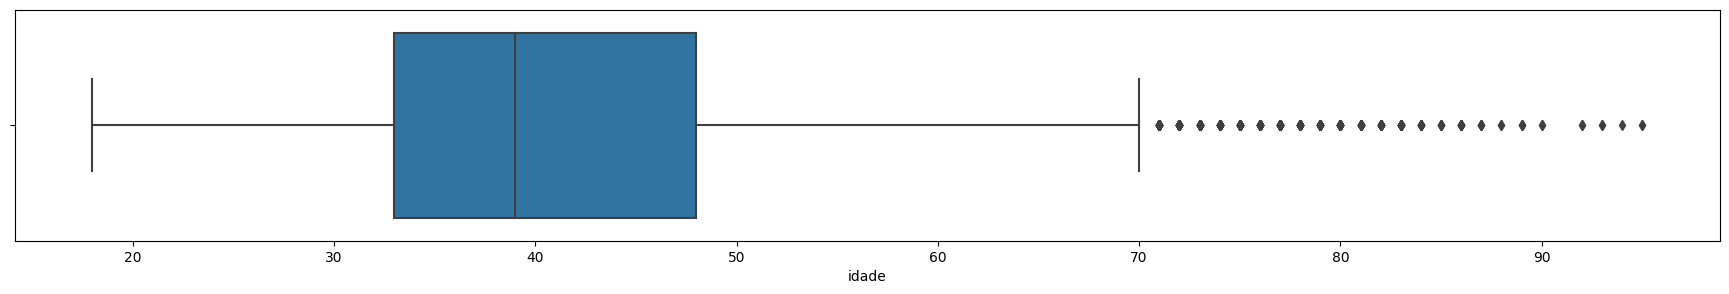

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
sns.boxplot(x=df['idade'])

<Axes: xlabel='contatos_anteriores'>

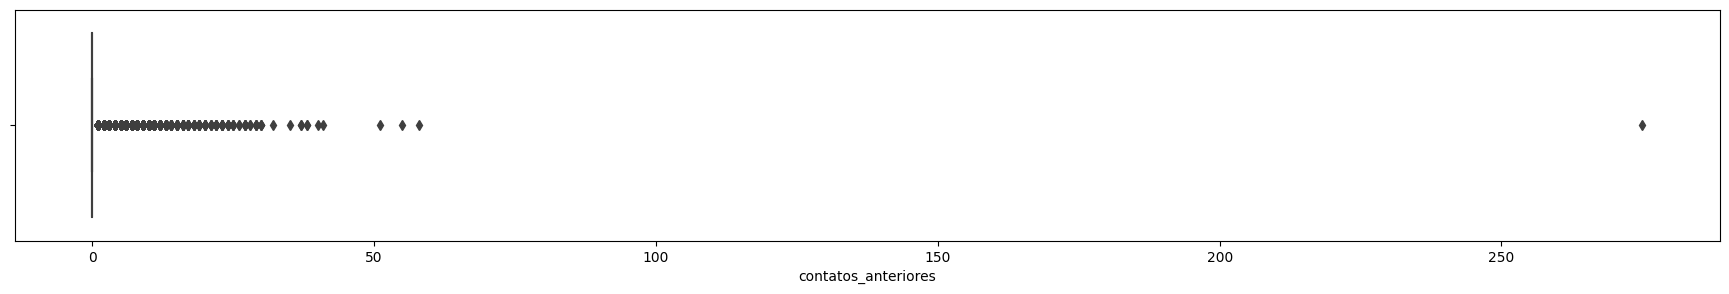

In [ ]:
sns.boxplot(x=df['contatos_anteriores'])

In [ ]:
df = df[df['contatos_anteriores']<=40]

<Axes: xlabel='contatos_anteriores'>

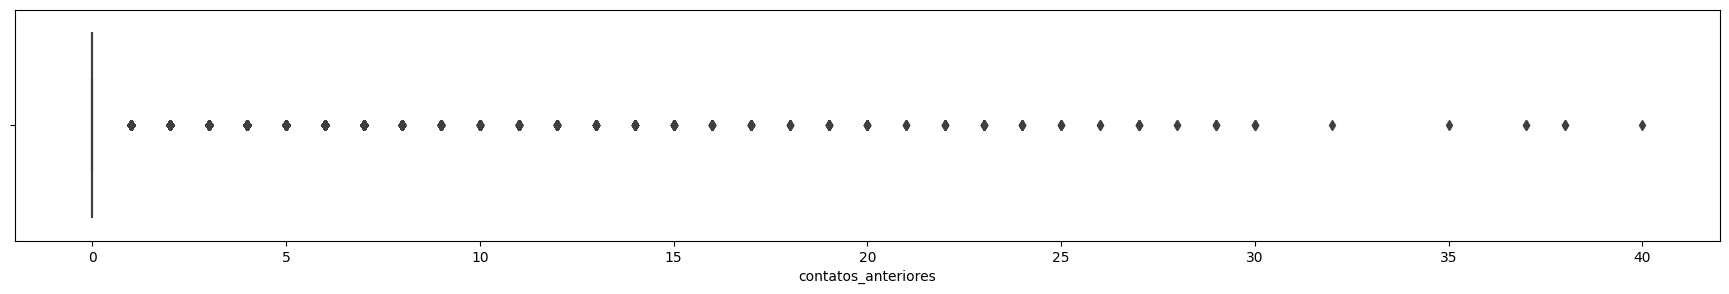

In [ ]:
sns.boxplot(x=df['contatos_anteriores'])

In [ ]:
df = df.reset_index(drop=True)

## Trabalhando com dados categóricos

### Ajuste de dados de texto

In [ ]:
df_textos = df.select_dtypes(exclude="number")
df_textos.head()

,profissao,estado_civil,educacao,inadimplencia,habitacao,emprestimo,contato,mes,resultado_campanha_anterior,alvo
0,trabalhador(a)-manual,casado(a),secundário,não,sim,não,,maio,desconhecido,não
1,serviços,solteiro(a),secundário,não,não,não,,junho,desconhecido,não
2,gerente,solteiro(a),secundário,não,sim,não,celular,abril,falha,não
3,administrativo,solteiro(a),secundário,não,não,não,celular,abril,desconhecido,sim
4,gerente,casado(a),terciário,não,não,sim,celular,julho,desconhecido,não


**Observações:**

- Quando vemos a coluna `contato` notamos que existem dados **vazios** nas primeiras linhas, vamos verificar que tipo de dado é esse.

In [ ]:
for col in df_textos.columns:
    print(f"Coluna: {col}")
    print(df_textos[col].unique())
    print("\n")

Coluna: profissao
['trabalhador(a)-manual' 'serviços' 'gerente' 'administrativo'
 'desempregado(a)' 'aposentado(a)' 'técnico(a)' 'doméstico(a)'
 'empreendedor(a)' 'desconhecido' 'estudante' 'autônomo(a)']


Coluna: estado_civil
['casado(a)' 'solteiro(a)' 'divorciado(a)']


Coluna: educacao
['secundário' 'terciário' 'desconhecido' 'primário']


Coluna: inadimplencia
['não' 'sim']


Coluna: habitacao
['sim' 'não']


Coluna: emprestimo
['não' 'sim']


Coluna: contato
[' ' 'celular' 'telefone']


Coluna: mes
['maio' 'junho' 'abril' 'julho' 'fevereiro' 'março' 'outubro' 'novembro'
 'agosto' 'janeiro' 'setembro' 'dezembro']


Coluna: resultado_campanha_anterior
['desconhecido' 'falha' 'outro' 'sucesso']


Coluna: alvo
['não' 'sim']




In [ ]:
df['contato'] = df['contato'].replace(' ', 'outro')

In [ ]:
df['contato'].unique()

array(['outro', 'celular', 'telefone'], dtype=object)

Variáveis categóricas são uma forma de agrupar informações em categorias diferentes, sem um valor numérico associado a elas, como o caso das variáveis numéricas.

Não conseguimos atribuir um valor numérico para essas variáveis, apenas classificá-las em categorias distintas.

**Variáveis categóricas binárias:**

- São um tipo especial de variável categórica que apresenta apenas duas categorias possíveis, como sim/não, verdadeiro/falso, ou presente/ausente. As variáveis categóricas binárias são úteis para analisar a distribuição de dados em apenas duas categorias distintas.

**Variáveis categóricas nominais:**

- Não têm uma ordem específica ou hierarquia entre as categorias. Por exemplo, ao analisar as preferências musicais de um grupo de pessoas, é possível usar variáveis categóricas nominais para classificar as pessoas em grupos como "rock," "jazz," ou "pop."

**Variáveis categóricas ordinais:**

- Possuem uma ordem específica entre as categorias. Por exemplo, ao analisar o nível de escolaridade de um grupo de pessoas, é possível usar esse tipo de variável para classificá-las em grupos como "ensino fundamental completo," "ensino médio completo," ou "ensino superior completo," seguindo uma ordem hierárquica.

### Dados categóricos - binários

**Observações:**

- Existem colunas binárias em formato de texto: `inadimplencia`, `habitacao`, `emprestimo`, `alvo`

In [ ]:
binario_map = {
    'sim': 1,
    'não': 0
}

df['alvo'].map(binario_map)

0        0
1        0
2        0
3        1
4        0
        ..
45186    1
45187    0
45188    0
45189    0
45190    0
Name: alvo, Length: 45191, dtype: int64

In [ ]:
# Aplicar as traduções às colunas categóricas
df['inadimplencia'] = df['inadimplencia'].map(binario_map)
df['habitacao'] = df['habitacao'].map(binario_map)
df['emprestimo'] = df['emprestimo'].map(binario_map)
df['alvo'] = df['alvo'].map(binario_map)

### Dados categóricos - multicategórico

In [ ]:
df

,id,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,4777,40.0,trabalhador(a)-manual,casado(a),secundário,0,580.0,1,0,outro,16,maio,192,1,0,desconhecido,0
1,10929,47.0,serviços,solteiro(a),secundário,0,3644.0,0,0,outro,9,junho,83,2,0,desconhecido,0
2,34411,28.0,gerente,solteiro(a),secundário,0,967.0,1,0,celular,20,abril,174,1,1,falha,0
3,32887,53.0,administrativo,solteiro(a),secundário,0,2892.0,0,0,celular,9,abril,527,3,0,desconhecido,1
4,16739,56.0,gerente,casado(a),terciário,0,217.0,0,1,celular,21,julho,121,2,0,desconhecido,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,12285,44.0,doméstico(a),solteiro(a),primário,0,1059.0,0,0,outro,18,junho,2093,1,0,desconhecido,1
45187,45733,23.0,estudante,solteiro(a),terciário,0,508.0,0,0,celular,8,setembro,210,1,1,falha,0
45188,39159,34.0,técnico(a),divorciado(a),terciário,0,1317.0,1,0,celular,15,maio,239,1,0,desconhecido,0
45189,1861,33.0,aposentado(a),casado(a),secundário,0,165.0,0,0,outro,7,maio,111,1,0,desconhecido,0


O ID é único para cada um dos 45.200 clientes registrados na nossa base de dados.

Essa é uma coluna categórica, mas não faz sentido mantê-la no nosso conjunto de dados, pois ela não nos traz nenhuma informação relevante para o modelo de machine learning.

In [ ]:
df.drop('id', axis=1, inplace=True)
df

,idade,profissao,estado_civil,educacao,inadimplencia,saldo,habitacao,emprestimo,contato,dia,mes,duracao,campanha,contatos_anteriores,resultado_campanha_anterior,alvo
0,40.0,trabalhador(a)-manual,casado(a),secundário,0,580.0,1,0,outro,16,maio,192,1,0,desconhecido,0
1,47.0,serviços,solteiro(a),secundário,0,3644.0,0,0,outro,9,junho,83,2,0,desconhecido,0
2,28.0,gerente,solteiro(a),secundário,0,967.0,1,0,celular,20,abril,174,1,1,falha,0
3,53.0,administrativo,solteiro(a),secundário,0,2892.0,0,0,celular,9,abril,527,3,0,desconhecido,1
4,56.0,gerente,casado(a),terciário,0,217.0,0,1,celular,21,julho,121,2,0,desconhecido,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,44.0,doméstico(a),solteiro(a),primário,0,1059.0,0,0,outro,18,junho,2093,1,0,desconhecido,1
45187,23.0,estudante,solteiro(a),terciário,0,508.0,0,0,celular,8,setembro,210,1,1,falha,0
45188,34.0,técnico(a),divorciado(a),terciário,0,1317.0,1,0,celular,15,maio,239,1,0,desconhecido,0
45189,33.0,aposentado(a),casado(a),secundário,0,165.0,0,0,outro,7,maio,111,1,0,desconhecido,0


In [ ]:
df_textos = df.select_dtypes(exclude="number")
df_textos.head()

,profissao,estado_civil,educacao,contato,mes,resultado_campanha_anterior
0,trabalhador(a)-manual,casado(a),secundário,outro,maio,desconhecido
1,serviços,solteiro(a),secundário,outro,junho,desconhecido
2,gerente,solteiro(a),secundário,celular,abril,falha
3,administrativo,solteiro(a),secundário,celular,abril,desconhecido
4,gerente,casado(a),terciário,celular,julho,desconhecido


O ***One-Hot Encoding*** é uma técnica de pré-processamento usada para lidar com colunas categóricas em um DataFrame, transformando essas categorias em representações binárias, onde cada categoria se torna uma nova coluna binária (0 ou 1).

Vamos ver um exemplo, temos um DataFrame que possui uma coluna de cores com valores categóricos:

|    | Cor      |
|---:|:---------|
|  0 | Vermelho |
|  1 | Azul     |
|  2 | Verde    |
|  3 | Vermelho |
|  4 | Amarelo  |

Ao aplicar o *One-Hot Encoding* convertemos cada cor (categoria) em uma coluna binária:

| | Cor_Amarelo | Cor_Azul | Cor_Verde | Cor_Vermelho |
|---:|-----:|---------:|-------:|-------:|
|  0 |  0 |          0 |0 |   1 |
|  1 |  0 |          1 |0 |   0 |
|  2 |  0 |          0 |1 |   0 |
|  3 |  0 |          0 |0 |   1 |
|  4 |  1 |          0 |0 |   0 |

Cada categoria única na coluna 'Cor' se torna uma nova coluna binária no DataFrame codificado. Por exemplo, 'Vermelho' se torna uma coluna chamada 'Cor_Vermelho', onde temos 1 para as linhas em que a cor é 'Vermelho' e 0 caso contrário. O mesmo princípio se aplica às outras cores.

In [ ]:
df = pd.get_dummies(df)
df

,idade,inadimplencia,saldo,habitacao,emprestimo,dia,duracao,campanha,contatos_anteriores,alvo,...,mes_junho,mes_maio,mes_março,mes_novembro,mes_outubro,mes_setembro,resultado_campanha_anterior_desconhecido,resultado_campanha_anterior_falha,resultado_campanha_anterior_outro,resultado_campanha_anterior_sucesso
0,40.0,0,580.0,1,0,16,192,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,47.0,0,3644.0,0,0,9,83,2,0,0,...,1,0,0,0,0,0,1,0,0,0
2,28.0,0,967.0,1,0,20,174,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,0,2892.0,0,0,9,527,3,0,1,...,0,0,0,0,0,0,1,0,0,0
4,56.0,0,217.0,0,1,21,121,2,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,44.0,0,1059.0,0,0,18,2093,1,0,1,...,1,0,0,0,0,0,1,0,0,0
45187,23.0,0,508.0,0,0,8,210,1,1,0,...,0,0,0,0,0,1,0,1,0,0
45188,34.0,0,1317.0,1,0,15,239,1,0,0,...,0,1,0,0,0,0,1,0,0,0
45189,33.0,0,165.0,0,0,7,111,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45191 entries, 0 to 45190
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   idade                                     45191 non-null  float64
 1   inadimplencia                             45191 non-null  int64  
 2   saldo                                     45191 non-null  float64
 3   habitacao                                 45191 non-null  int64  
 4   emprestimo                                45191 non-null  int64  
 5   dia                                       45191 non-null  int64  
 6   duracao                                   45191 non-null  int64  
 7   campanha                                  45191 non-null  int64  
 8   contatos_anteriores                       45191 non-null  int64  
 9   alvo                                      45191 non-null  int64  
 10  profissao_administrativo          

# Métodos do projeto

Links da documentação para os métodos utilizados na oficina.

- [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv)
- [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info)
- [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)
- [`nunique`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html#pandas.DataFrame.nunique)
- [`duplicated`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated)
- [`Funções built-in`](https://docs.python.org/3/library/functions.html)
- [`drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates)
- [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)
- [`unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html#pandas.Series.unique)
- [`isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull)
- [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- [`reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)
- [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes)
- [`plt.rcParams`](https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-dynamic-rc-settings)
- [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace)
- [`map`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map)
- [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)
- [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#pandas-get-dummies)